In [1]:
# Mount notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [70]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import tensorflow as tf

In [25]:
def getLabels(outputFile, subDir):
  dataPath = '/content/drive/My Drive/waste_dataset_resized/' + subDir + '/'

  # Load data and write to list
  with open(outputFile , 'w', newline='') as csvf:
    Files = []
    for root, subDir, fil in os.walk(dataPath):
      for _file in fil:
        if _file.endswith(".jpg"):
          Files.append(_file)

    # Assign label index to each class
    writer = csv.writer(csvf, delimiter=',')
    for file_name in Files:

      if "plastic" in file_name:
        t = 1
      if "cardboard" in file_name:
        t = 2
      if "metal" in file_name:
        t = 3
      if "paper" in file_name:
        t = 4
      if "glass" in file_name:
        t = 5
      if "trash" in file_name:
        t = 6
      writer.writerow([file_name,t])

# **Preprocessing Images**

In [128]:
def processData(subDir, labelsFileName):
  # Store images and labels
  labels = []
  images = []
  # classNames = ['plastic', 'cardboard', 'metal', 'paper', 'glass', 'trash']
  classesDict = {
    1:"plastic",
    2:"cardboard",
    3:"metal",
    4:"paper",
    5:"glass",
    6:"trash"
  }
  imageList = []

  dataPath = '/content/drive/My Drive/waste_dataset_resized/'

  with open(labelsFileName, 'r') as csv_file:
    lines = csv_file.readlines()

    for line in lines:
      data = line.split(',')
      labels.append(data[1])
      imageList.append(data[0])
  
  for i in range(len(imageList)):
      label = labels[i].rstrip("\n")
      img = cv2.imread(dataPath + subDir + '/' + classesDict[int(label)] + '/' + imageList[i])
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      images.append(img)

  # Transform into numpy array
  images = np.array(images, dtype = 'float32')
  labels = np.array(labels, dtype = 'int32')

  return images, labels

In [129]:
trainImages, trainLabels = processData('train', 'trainIndexedData.csv')

In [130]:
testImages, testLabels = processData('test', 'testIndexedData.csv')

In [131]:
n_train = trainLabels.shape[0]
n_test = testLabels.shape[0]

print(n_train)
print(n_test)

606
198


In [132]:
# Scale the data
trainImages = trainImages/255.0
testImages = testImages/255.0

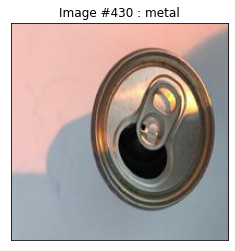

In [138]:
# Visualize random image
index = np.random.randint(trainImages.shape[0])
plt.figure()
plt.imshow(trainImages[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + classesDict[trainLabels[index]])
plt.show()

In [134]:
classesDict = {
    1:"plastic",
    2:"cardboard",
    3:"metal",
    4:"paper",
    5:"glass",
    6:"trash"
}

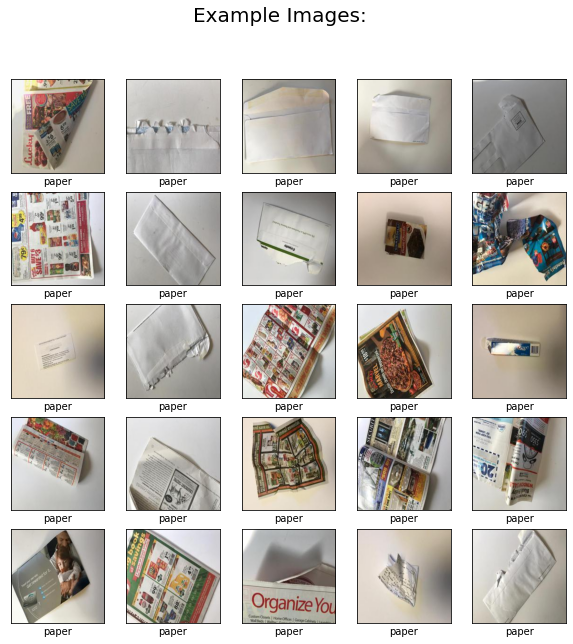

In [135]:
# Visualize images with labels
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Example Images:", fontsize = 20)
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainImages[i], cmap=plt.cm.binary)
  plt.xlabel(classesDict[trainLabels[i]])

plt.show()

In [145]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [146]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(trainImages, trainLabels, batch_size=128, epochs=20, validation_split = 0.25)

Epoch 1/20
4/4 [==============================] - 17s 4s/step - loss: 10.4302 - accuracy: 0.1718 - val_loss: 16.7161 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 7.7476 - accuracy: 0.2467 - val_loss: 3.2765 - val_accuracy: 0.0066
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 2.0865 - accuracy: 0.2555 - val_loss: 2.1391 - val_accuracy: 0.2697
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 1.6882 - accuracy: 0.3084 - val_loss: 2.4918 - val_accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 1.5847 - accuracy: 0.2401 - val_loss: 3.4887 - val_accuracy: 0.0000e+00
Epoch 6/20
